In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np

# STEP 1  : Problem Statement

###  Churn Analysis of a Telecom Operator

- Lets understand what is churn :

![](./attachments/churn.png)

- So basically we need to find if these Telecom operator(i.e. BSNL, Vodafone, AT&T) loosing their customers.

# STEP 2  : Data Collection

###  We have 3 datasets to draw insights from

In [2]:
# 1.churn_data.csv
# 2.customer_data.csv
# 3.internet_data.csv

In [3]:
# Lets import the datasets
churn_data = pd.read_csv("dataset/churn_data.csv")
customer_data = pd.read_csv("dataset/customer_data.csv")
internet_data = pd.read_csv("dataset/internet_data.csv")

In [4]:
# Lets see data inside
churn_data.head(2)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No


In [5]:
# Lets see data inside
customer_data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No


In [6]:
# Lets see data inside
internet_data.head(2)

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No


In [7]:
# I took a look at all the datasets and figured out 'customerID' is common attribute
# So lets merge the dataframes on 'customerID' with inner-join

#Merging data frames on 'customerID'
temp_data = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [8]:
telecom_data = pd.merge(temp_data, internet_data, how='inner', on='customerID')

### Let's take a look at our dataframe

In [9]:
telecom_data.head(3)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No


In [10]:
telecom_data.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [11]:
# Let's check the data type of each column and check non null values
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [12]:
telecom_data['TotalCharges'] =  pd.to_numeric(telecom_data['TotalCharges'],errors='coerce')

# STEP 3  : Data Cleaning


In [13]:
# Converting Yes to 1 and No to 0
telecom_data['PhoneService'] = telecom_data['PhoneService'].map({'Yes': 1, 'No': 0})
telecom_data['PaperlessBilling'] = telecom_data['PaperlessBilling'].map({'Yes': 1, 'No': 0})
telecom_data['Churn'] = telecom_data['Churn'].map({'Yes': 1, 'No': 0})
telecom_data['Partner'] = telecom_data['Partner'].map({'Yes': 1, 'No': 0})
telecom_data['Dependents'] = telecom_data['Dependents'].map({'Yes': 1, 'No': 0})

In [14]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   int64  
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   int64  
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7032 non-null   float64
 8   Churn             7043 non-null   int64  
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   int64  
 12  Dependents        7043 non-null   int64  
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


In [15]:
telecom_data_cleaned = pd.get_dummies(telecom_data.iloc[: , 1: ],drop_first=True)

In [16]:
telecom_data_cleaned.shape

(7043, 31)

In [17]:
telecom_data_cleaned.dropna().shape

(7032, 31)

### How much percent of NaN data we are removing :

In [18]:
percentage_to_delete = str(((telecom_data_cleaned.shape[0] - telecom_data_cleaned.dropna().shape[0]) / 
                            telecom_data_cleaned.shape[0]) * 100)

"So we are deleting " + percentage_to_delete + " percent of data. Which is absolutely fine. 5 percent is the maximum cap."

'So we are deleting 0.1561834445548772 percent of data. Which is absolutely fine. 5 percent is the maximum cap.'

### So lets delete the NaN values

In [19]:
telecom_data_cleaned.dropna(inplace=True)

In [20]:
telecom_data_cleaned

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,34,1,0,56.95,1889.50,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,2,1,1,53.85,108.15,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,45,0,0,42.30,1840.75,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
4,2,1,1,70.70,151.65,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,1,1,84.80,1990.50,0,0,1,1,1,...,0,0,0,1,0,1,0,1,0,1
7039,72,1,1,103.20,7362.90,0,0,1,1,1,...,0,1,0,1,0,0,0,1,0,1
7040,11,0,1,29.60,346.45,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
7041,4,1,1,74.40,306.60,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Checking the Churn Rate

In [21]:
churn = (sum(telecom_data_cleaned['Churn'])/len(telecom_data_cleaned['Churn'].index))*100

In [22]:
len(telecom_data_cleaned['Churn'].index)

7032

In [23]:
f"So we've {churn} % churn rate"

"So we've 26.578498293515356 % churn rate"

### Correlation Matrix

In [24]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

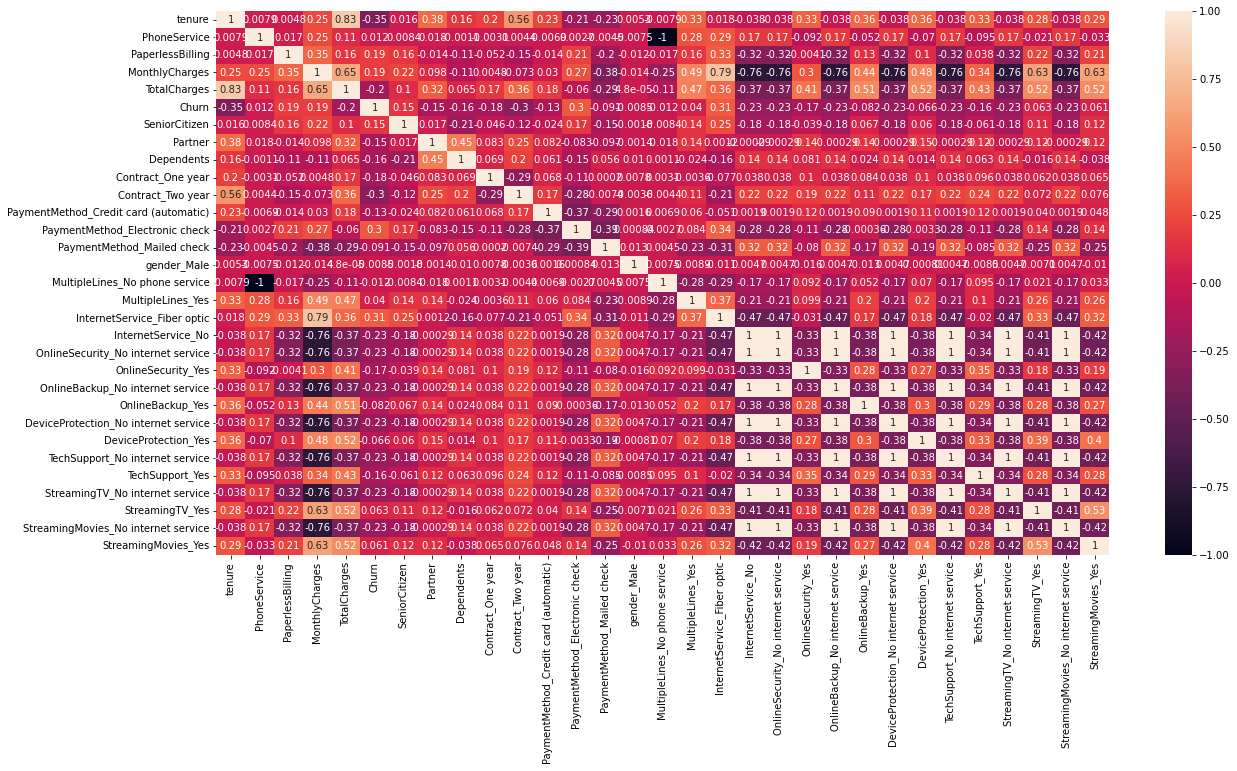

In [25]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom_data_cleaned.corr(),annot = True)

In [26]:
telecom_data_cleaned

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,34,1,0,56.95,1889.50,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,2,1,1,53.85,108.15,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,45,0,0,42.30,1840.75,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
4,2,1,1,70.70,151.65,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,1,1,84.80,1990.50,0,0,1,1,1,...,0,0,0,1,0,1,0,1,0,1
7039,72,1,1,103.20,7362.90,0,0,1,1,1,...,0,1,0,1,0,0,0,1,0,1
7040,11,0,1,29.60,346.45,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
7041,4,1,1,74.40,306.60,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
telecom_data_cleaned.drop('Churn',axis=1).columns

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'SeniorCitizen', 'Partner', 'Dependents',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype='object')

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

features_list = ['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'SeniorCitizen', 'Partner', 'Dependents',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes']

variables = telecom_data_cleaned[features_list]

vif = pd.DataFrame()
vif['Features'] = features_list
vif['VIF'] = [variance_inflation_factor(variables.values ,i)  for i in range(variables.shape[1])]

vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
0,tenure,7.584453
1,PhoneService,1773.528816
2,PaperlessBilling,1.208455
3,MonthlyCharges,866.089640
4,TotalCharges,10.811490
5,SeniorCitizen,1.153220
6,Partner,1.462988
7,Dependents,1.381598
8,Contract_One year,1.625784
9,Contract_Two year,2.652328


### Feature Standardisation

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
# Normalising continuous features
df = telecom_data_cleaned[['tenure','MonthlyCharges','TotalCharges']]

In [31]:
scaler = StandardScaler()

In [32]:
telecom_data_cleaned[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(telecom_data_cleaned[['tenure','MonthlyCharges','TotalCharges']])

In [33]:
telecom_data_cleaned

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,-1.280248,0,1,-1.161694,-0.994194,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0.064303,1,0,-0.260878,-0.173740,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,-1.239504,1,1,-0.363923,-0.959649,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0.512486,0,0,-0.747850,-0.195248,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
4,-1.239504,1,1,0.196178,-0.940457,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.343137,1,1,0.664868,-0.129180,0,0,1,1,1,...,0,0,0,1,0,1,0,1,0,1
7039,1.612573,1,1,1.276493,2.241056,0,0,1,1,1,...,0,1,0,1,0,0,0,1,0,1
7040,-0.872808,0,1,-1.170004,-0.854514,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
7041,-1.158016,1,1,0.319168,-0.872095,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
telecom_data_cleaned = telecom_data_cleaned.drop(['InternetService_No','OnlineSecurity_No internet service','OnlineBackup_No internet service','DeviceProtection_No internet service','TechSupport_No internet service','StreamingTV_No internet service','StreamingMovies_No internet service'],axis=1)

In [35]:
telecom_data_cleaned.shape

(7032, 24)

In [36]:
import statsmodels.api as sm

### Checking the Correlation Matrix
After dropping highly correlated variables now let's check the correlation matrix again.

<AxesSubplot:>

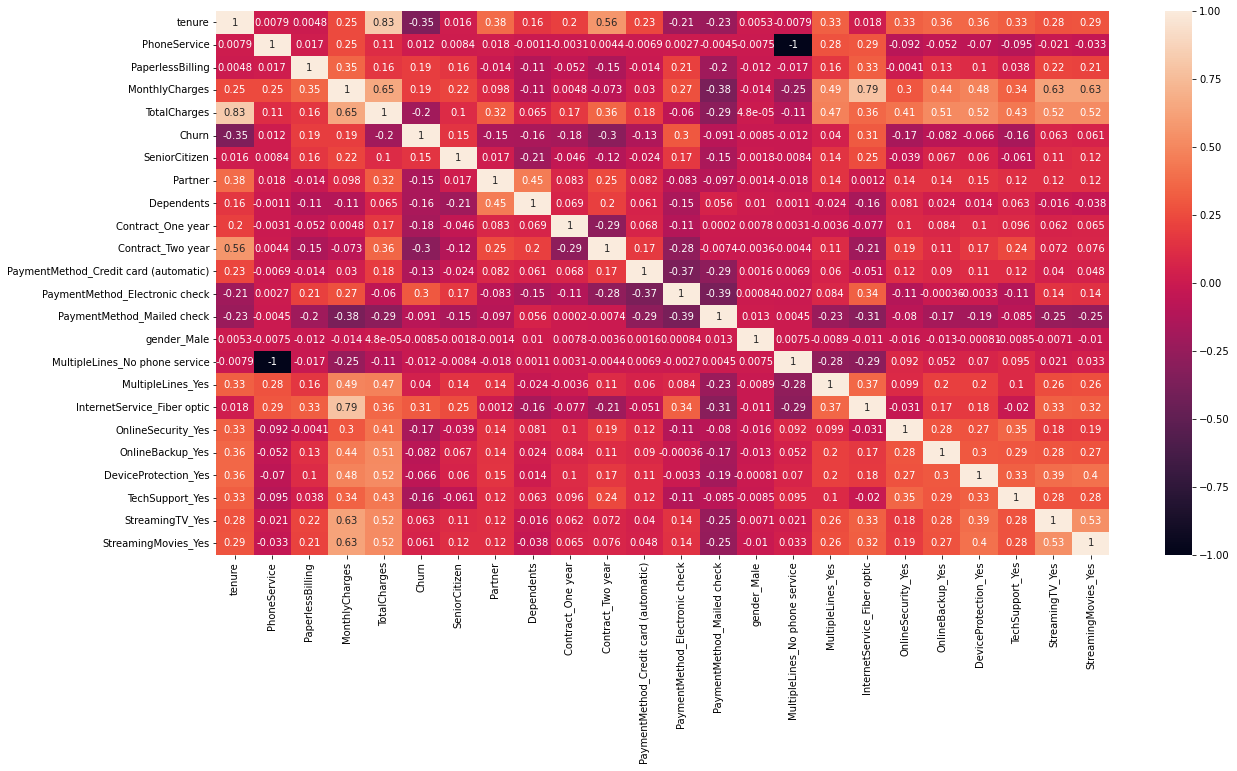

In [37]:
plt.figure(figsize = (20,10))
sns.heatmap(telecom_data_cleaned.corr(),annot = True)

#### 17 Features are valid we can see that by just looking at the vif table

### Feature Selection Using RFE

In [38]:
telecom_data_cleaned.columns

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'SeniorCitizen', 'Partner', 'Dependents',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

features_list = ['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'SeniorCitizen', 'Partner', 'Dependents',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes']

variables = telecom_data_cleaned[features_list]

vif = pd.DataFrame()
vif['Features'] = features_list
vif['VIF'] = [variance_inflation_factor(variables.values ,i)  for i in range(variables.shape[1])]

vif

,Features,VIF
0,tenure,7.600129
1,PhoneService,39.931390
2,PaperlessBilling,1.211180
3,MonthlyCharges,23.080001
4,TotalCharges,10.876504
5,Churn,1.396236
6,SeniorCitizen,1.155143
7,Partner,1.462570
8,Dependents,1.382069
9,Contract_One year,1.637527


In [40]:
# train_test_split
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = telecom_data_cleaned.drop(['Churn'],axis=1)

# Putting response variable to y
y = telecom_data_cleaned['Churn']

In [41]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=1000) # For Big datasets
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=21)             # running RFE with 21 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

[ True  True  True  True  True  True False  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 3 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1]


In [42]:
X

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
0,-1.280248,0,1,-1.161694,-0.994194,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0.064303,1,0,-0.260878,-0.173740,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
2,-1.239504,1,1,-0.363923,-0.959649,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
3,0.512486,0,0,-0.747850,-0.195248,0,0,0,1,0,...,1,1,0,0,1,0,1,1,0,0
4,-1.239504,1,1,0.196178,-0.940457,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.343137,1,1,0.664868,-0.129180,0,1,1,1,0,...,1,0,1,0,1,0,1,1,1,1
7039,1.612573,1,1,1.276493,2.241056,0,1,1,1,0,...,0,0,1,1,0,1,1,0,1,1
7040,-0.872808,0,1,-1.170004,-0.854514,0,1,1,0,0,...,0,1,0,0,1,0,0,0,0,0
7041,-1.158016,1,1,0.319168,-0.872095,1,1,0,0,0,...,1,0,1,1,0,0,0,0,0,0


In [43]:
col = X.columns[rfe.support_]
print(col)
X

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'SeniorCitizen', 'Dependents', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')


,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,...,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes
0,-1.280248,0,1,-1.161694,-0.994194,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,0.064303,1,0,-0.260878,-0.173740,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
2,-1.239504,1,1,-0.363923,-0.959649,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
3,0.512486,0,0,-0.747850,-0.195248,0,0,0,1,0,...,1,1,0,0,1,0,1,1,0,0
4,-1.239504,1,1,0.196178,-0.940457,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.343137,1,1,0.664868,-0.129180,0,1,1,1,0,...,1,0,1,0,1,0,1,1,1,1
7039,1.612573,1,1,1.276493,2.241056,0,1,1,1,0,...,0,0,1,1,0,1,1,0,1,1
7040,-0.872808,0,1,-1.170004,-0.854514,0,1,1,0,0,...,0,1,0,0,1,0,0,0,0,0
7041,-1.158016,1,1,0.319168,-0.872095,1,1,0,0,0,...,1,0,1,1,0,0,0,0,0,0


In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

features_list =['tenure', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'SeniorCitizen', 'Dependents', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes']

variables = X[features_list]

vif = pd.DataFrame()
vif['Features'] = features_list
vif['VIF'] = [variance_inflation_factor(variables.values ,i)  for i in range(variables.shape[1])]

vif

,Features,VIF
0,tenure,7.482974
1,PaperlessBilling,2.780985
2,MonthlyCharges,8.913587
3,TotalCharges,10.436813
4,SeniorCitizen,1.352200
5,Dependents,1.574299
6,Contract_One year,2.042474
7,Contract_Two year,3.480854
8,PaymentMethod_Credit card (automatic),1.891606
9,PaymentMethod_Electronic check,2.737054


In [45]:
X.drop('PhoneService',inplace=True,axis=1)

col = X.columns

print(col)
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=1)

Index(['tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'SeniorCitizen', 'Partner', 'Dependents', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'gender_Male', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes'],
      dtype='object')


In [46]:
#Comparing the model with StatsModels
logm = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm.fit().summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4899
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2040.3
Date:                Wed, 04 May 2022   Deviance:                       4080.7
Time:                        02:38:53   Pearson chi2:                 5.58e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.2610      0.254     -4.955      0.000      -1.760      -0.762
tenure                                   -1.5702      0.185     -8.500      0.000      -1.932      -1.208
PaperlessBilling                          0.2751      0.089      3.109      0.002       0.102       0.449
MonthlyCharges                            0.7770      0.195      3.990      0.000       0.395       1.159
TotalCharges                              0.7993      0.192      4.161      0.000       0.423       1.176
SeniorCitizen                             0.2144      0.100      2.143      0.032       0.018       0.410
Partner                                  -0.0255      0.092     -0.276      0.783      -0.206       0.156
Dependents                               -0.0526      0.107     -0.492      0.623      -0.262       0.157
Contract_One year                        -0.7172      0.128     -5.610      0.000      -0.968      -0.467
Contract_Two year                        -1.5698      0.215     -7.304      0.000      -1.991      -1.149
PaymentMethod_Credit card (automatic)    -0.0028      0.136     -0.020      0.984      -0.269       0.264
PaymentMethod_Electronic check            0.2917      0.114      2.568      0.010       0.069       0.514
PaymentMethod_Mailed check               -0.1711      0.138     -1.243      0.214      -0.441       0.099
gender_Male                               0.0224      0.077      0.289      0.772      -0.129       0.174
MultipleLines_No phone service            1.2534      0.174      7.203      0.000       0.912       1.594
MultipleLines_Yes                         0.2327      0.103      2.265      0.024       0.031       0.434
InternetService_Fiber optic               0.0524      0.226      0.232      0.817      -0.390       0.495
OnlineSecurity_Yes                       -0.4987      0.112     -4.468      0.000      -0.717      -0.280
OnlineBackup_Yes                         -0.3058      0.101     -3.022      0.003      -0.504      -0.107
DeviceProtection_Yes                     -0.2242      0.103     -2.177      0.030      -0.426      -0.022
TechSupport_Yes                          -0.4626      0.112     -4.115      0.000      -0.683      -0.242
StreamingTV_Yes                          -0.0077      0.120     -0.064      0.949      -0.244       0.228
StreamingMovies_Yes                       0.0231      0.120      0.193      0.847      -0.212       0.258
=========================================================================================================
"""

In [47]:
# Let's check the null hypothesis by p-values

In [48]:
'StreamingMovies_Yes','StreamingTV_Yes','InternetService_Fiber optic','gender_Male','PaymentMethod_Mailed check','PaymentMethod_Credit card (automatic)','Dependents','Partner'

('StreamingMovies_Yes',
 'StreamingTV_Yes',
 'InternetService_Fiber optic',
 'gender_Male',
 'PaymentMethod_Mailed check',
 'PaymentMethod_Credit card (automatic)',
 'Dependents',
 'Partner')

In [49]:
X_train.drop(['StreamingMovies_Yes','StreamingTV_Yes','InternetService_Fiber optic','gender_Male','PaymentMethod_Mailed check','PaymentMethod_Credit card (automatic)','Dependents','Partner'],inplace=True,axis=1)

In [50]:
X_test.drop(['StreamingMovies_Yes','StreamingTV_Yes','InternetService_Fiber optic','gender_Male','PaymentMethod_Mailed check','PaymentMethod_Credit card (automatic)','Dependents','Partner'],inplace=True,axis=1)

<AxesSubplot:>

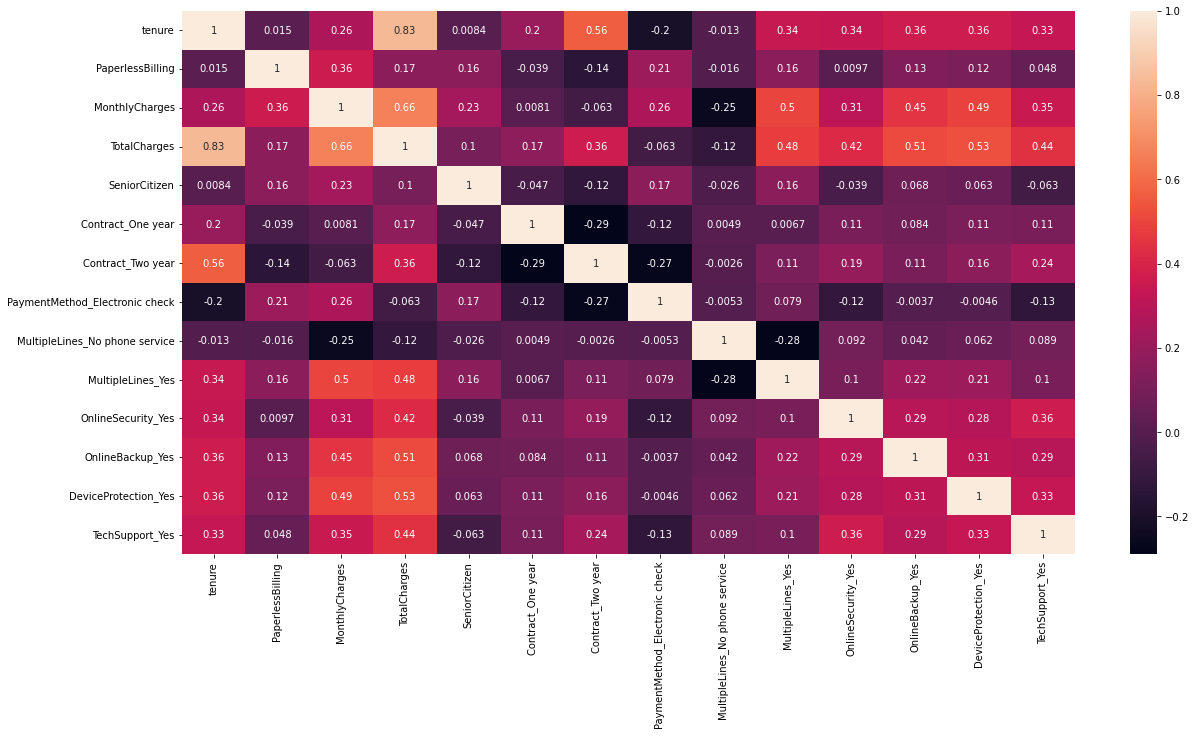

In [51]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)

In [52]:
logm = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm.fit().summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2041.7
Date:                Wed, 04 May 2022   Deviance:                       4083.3
Time:                        02:38:55   Pearson chi2:                 5.63e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.2955      0.123    -10.504      0.000      -1.537      -1.054
tenure                            -1.5447      0.180     -8.603      0.000      -1.897      -1.193
PaperlessBilling                   0.2812      0.088      3.185      0.001       0.108       0.454
MonthlyCharges                     0.8371      0.080     10.434      0.000       0.680       0.994
TotalCharges                       0.7820      0.186      4.197      0.000       0.417       1.147
SeniorCitizen                      0.2272      0.098      2.318      0.020       0.035       0.419
Contract_One year                 -0.7244      0.126     -5.747      0.000      -0.971      -0.477
Contract_Two year                 -1.5781      0.213     -7.400      0.000      -1.996      -1.160
PaymentMethod_Electronic check     0.3510      0.083      4.236      0.000       0.189       0.513
MultipleLines_No phone service     1.2755      0.156      8.202      0.000       0.971       1.580
MultipleLines_Yes                  0.2281      0.098      2.335      0.020       0.037       0.420
OnlineSecurity_Yes                -0.5115      0.100     -5.098      0.000      -0.708      -0.315
OnlineBackup_Yes                  -0.3155      0.093     -3.402      0.001      -0.497      -0.134
DeviceProtection_Yes              -0.2362      0.097     -2.443      0.015      -0.426      -0.047
TechSupport_Yes                   -0.4771      0.102     -4.699      0.000      -0.676      -0.278
==================================================================================================
"""

In [53]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train, y_train)

LogisticRegression()

### Making Predictions

In [54]:
# Predicted probabilities
y_pred = logsk.predict_proba(X_test)
y_pred

array([[0.99800429, 0.00199571],
       [0.32537334, 0.67462666],
       [0.92922485, 0.07077515],
       ...,
       [0.70530401, 0.29469599],
       [0.59796216, 0.40203784],
       [0.99062458, 0.00937542]])

In [55]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [56]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

In [57]:
# Let's see the head
y_pred_df.head()[1]

0    0.001996
1    0.674627
2    0.070775
3    0.693264
4    0.504508
Name: 1, dtype: float64

In [58]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [59]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [60]:
y_test_df

,Churn,CustID
1778,0,1778
5036,1,5036
1106,0,1106
1665,0,1665
927,1,927
...,...,...
2053,1,2053
6217,0,6217
5222,0,5222
5868,0,5868


In [61]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [62]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [63]:
y_pred_final

,Churn,CustID,1
0,0,1778,0.001996
1,1,5036,0.674627
2,0,1106,0.070775
3,0,1665,0.693264
4,1,927,0.504508
...,...,...,...
2105,1,2053,0.244990
2106,0,6217,0.047064
2107,0,5222,0.294696
2108,0,5868,0.402038


In [64]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
y_pred_final

,Churn,CustID,Churn_Prob
0,0,1778,0.001996
1,1,5036,0.674627
2,0,1106,0.070775
3,0,1665,0.693264
4,1,927,0.504508
...,...,...,...
2105,1,2053,0.244990
2106,0,6217,0.047064
2107,0,5222,0.294696
2108,0,5868,0.402038


In [65]:
# Rearranging the columns
y_pred_final = y_pred_final[ ['CustID','Churn','Churn_Prob'] ] 

In [66]:
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,1778,0,0.001996
1,5036,1,0.674627
2,1106,0,0.070775
3,1665,0,0.693264
4,927,1,0.504508


In [67]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)
y_pred_final

C:\Users\vaibhav\AppData\Local\Temp/ipykernel_14928/3679350326.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)


,CustID,Churn,Churn_Prob,predicted
0,1778,0,0.001996,0
1,5036,1,0.674627,1
2,1106,0,0.070775,0
3,1665,0,0.693264,1
4,927,1,0.504508,1
...,...,...,...,...
2105,2053,1,0.244990,0
2106,6217,0,0.047064,0
2107,5222,0,0.294696,0
2108,5868,0,0.402038,0


In [68]:
# Let's see the head
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted
0,1778,0,0.001996,0
1,5036,1,0.674627,1
2,1106,0,0.070775,0
3,1665,0,0.693264,1
4,927,1,0.504508,1


### Model Evaluation

In [69]:
from sklearn import metrics

In [70]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.predicted )
confusion

array([[1385,  170],
       [ 246,  309]], dtype=int64)

In [71]:
pd.DataFrame(confusion,index=['Actual 0','Actual 1'],columns=['Pred 0','Pred 1'])

,Pred 0,Pred 1
Actual 0,1385,170
Actual 1,246,309


In [72]:
metrics.accuracy_score( y_pred_final.Churn, y_pred_final.predicted)

0.8028436018957346

In [73]:
# Values from Maxtrix

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [74]:
# Let's find the sensitivity or True Positive rate
TP / float(TP+FN)

0.5567567567567567

In [75]:
# Let's find the specificity or True Negative rate
TN / float(TN+FP)

0.8906752411575563

In [76]:
# Calculate false postive rate - predicting churn when customer does not have churned
FP/ float(TN+FP)

0.10932475884244373

In [77]:
# positive predictive value
TP / float(TP+FP)

0.6450939457202505

In [78]:
# Negative predictive value
TN / float(TN+ FN)

0.8491722869405273

### ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [79]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

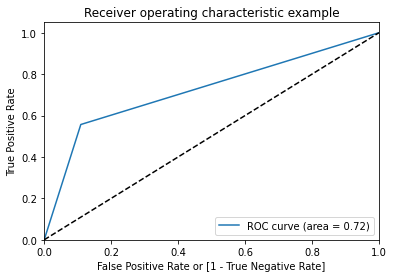

(array([0.        , 0.10932476, 1.        ]),
 array([0.        , 0.55675676, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [80]:
draw_roc(y_pred_final.Churn, y_pred_final.predicted)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [81]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

C:\Users\vaibhav\AppData\Local\Temp/ipykernel_14928/307559451.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)


,CustID,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1778,0,0.001996,0,1,0,0,0,0,0,0,0,0,0
1,5036,1,0.674627,1,1,1,1,1,1,1,1,0,0,0
2,1106,0,0.070775,0,1,0,0,0,0,0,0,0,0,0
3,1665,0,0.693264,1,1,1,1,1,1,1,1,0,0,0
4,927,1,0.504508,1,1,1,1,1,1,1,0,0,0,0


In [82]:
numbers

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [83]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]

cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.263033,1.000000,0.000000
0.1,0.1,0.617536,0.949550,0.499035
0.2,0.2,0.702844,0.884685,0.637942
0.3,0.3,0.759716,0.778378,0.753055
0.4,0.4,0.785782,0.672072,0.826367
0.5,0.5,0.802844,0.556757,0.890675
0.6,0.6,0.790995,0.372973,0.940193
0.7,0.7,0.772512,0.200000,0.976849
0.8,0.8,0.744550,0.030631,0.999357
0.9,0.9,0.736967,0.000000,1.000000


<AxesSubplot:xlabel='prob'>

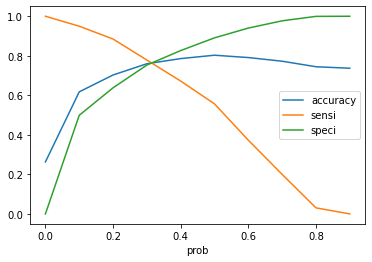

In [84]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [85]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

C:\Users\vaibhav\AppData\Local\Temp/ipykernel_14928/1203948032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)


In [86]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1778,0,0.001996,0,1,0,0,0,0,0,0,0,0,0,0
1,5036,1,0.674627,1,1,1,1,1,1,1,1,0,0,0,1
2,1106,0,0.070775,0,1,0,0,0,0,0,0,0,0,0,0
3,1665,0,0.693264,1,1,1,1,1,1,1,1,0,0,0,1
4,927,1,0.504508,1,1,1,1,1,1,1,0,0,0,0,1


In [87]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.Churn, y_pred_final.final_predicted)

0.7597156398104266

In [88]:
confusion_final = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.final_predicted )

In [89]:
TP = confusion_final[1,1] # true positive 
TN = confusion_final[0,0] # true negatives
FP = confusion_final[0,1] # false positives
FN = confusion_final[1,0] # false negatives

In [90]:
# Let's find the sensitivity or True Positive rate or Sensitivity
TP / float(TP+FN)

0.7783783783783784

In [91]:
# Let's find the specificity or True Negative rate
TN / float(TN+FP)

0.7530546623794212

In [92]:
# Calculate false postive rate - predicting churn when customer does not have churned
FP/ float(TN+FP)

0.24694533762057877

In [93]:
# positive predictive value  Presicion 
print (TP / float(TP+FP))

0.5294117647058824


In [94]:
# Negative predictive value or TNR
print (TN / float(TN+ FN))

0.9049459041731066
